<a href="https://colab.research.google.com/github/varunsmhatre/Kaggle_Comp/blob/main/Digit%20Recognizer/Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download the Dataset

In [1]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download digit-recognizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
 72% 11.0M/15.3M [00:00<00:00, 105MB/s]
100% 15.3M/15.3M [00:00<00:00, 119MB/s]


In [2]:
! unzip digit-recognizer.zip

Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [10]:
import pandas as pd 
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [11]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [12]:
df.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [14]:
df_train, df_val = train_test_split(df, test_size=0.2, random_state=42)

In [18]:
def df_to_tensor(df):
  columns_list = df.columns
  if 'label' in columns_list:
    X = tf.constant(df[columns_list[1:]].values, dtype=tf.dtypes.float16)/255.
    # y = tf.expand_dims(tf.constant(df['label'].values), axis=0)
    y = tf.constant(df['label'].values)
    return X, y
  else:
    X = tf.constant(df.values, dtype=tf.dtypes.float16)/255.
    return X 

In [19]:
X_train, y_train = df_to_tensor(df_train)
X_val, y_val = df_to_tensor(df_val)

In [59]:
model = tf.keras.models.Sequential([
                        tf.keras.layers.Dense(100, activation='relu', input_shape=(784,)),
                        tf.keras.layers.Dense(60, activation='relu'),
                        tf.keras.layers.Dropout(0.6),
                        tf.keras.layers.Dense(40, activation='relu'),
                        tf.keras.layers.Dropout(0.4),
                        tf.keras.layers.Dense(20, activation='relu'),
                        tf.keras.layers.Dropout(0.2),
                        tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'],
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))


history = model.fit(X_train, y_train, batch_size=32, epochs=15, validation_data=(X_val, y_val))

Epoch 1/15
1050/1050 [==============================] - 6s 5ms/step - loss: 1.1317 - accuracy: 0.6040 - val_loss: 0.3367 - val_accuracy: 0.9152
Epoch 2/15
1050/1050 [==============================] - 3s 3ms/step - loss: 0.5603 - accuracy: 0.8301 - val_loss: 0.2370 - val_accuracy: 0.9389
Epoch 3/15
1050/1050 [==============================] - 3s 3ms/step - loss: 0.4309 - accuracy: 0.8769 - val_loss: 0.2147 - val_accuracy: 0.9449
Epoch 4/15
1050/1050 [==============================] - 3s 3ms/step - loss: 0.3598 - accuracy: 0.8987 - val_loss: 0.1868 - val_accuracy: 0.9537
Epoch 5/15
1050/1050 [==============================] - 3s 3ms/step - loss: 0.3184 - accuracy: 0.9115 - val_loss: 0.1983 - val_accuracy: 0.9540
Epoch 6/15
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2845 - accuracy: 0.9221 - val_loss: 0.1769 - val_accuracy: 0.9580
Epoch 7/15
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2633 - accuracy: 0.9273 - val_loss: 0.1763 - val_accuracy:

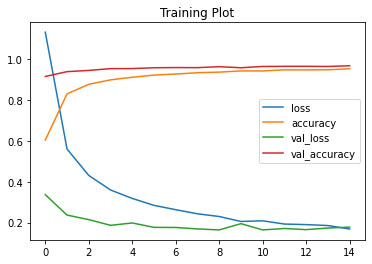

In [60]:
pd.DataFrame(history.history).plot(title="Training Plot")

In [61]:
X_test = df_to_tensor(df_test)

In [62]:
y_pred = model.predict(X_test)

In [63]:
y_pred_labels = tf.argmax(y_pred, axis=1)

In [64]:
from google.colab import files

In [65]:
file_name = 'digit_recog_submission.csv'

In [66]:
pd.DataFrame({'ImageId':list(range(1, len(y_pred)+1)), 'Label':y_pred_labels}).to_csv(file_name, index=False)
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>